In [1]:
from skimage.transform import downscale_local_mean
from skimage.io import imread,imsave
from skimage import measure
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import scipy.signal as ss
import os
from sklearn.decomposition import NMF

In [2]:
img = imread('/Users/zhengj10/Desktop/iGluSnFR/Mini/230207_Plate_003_633.217_FOV_00006.tif')
img.shape

(6000, 512, 512)

In [3]:
img = downscale_local_mean(img,(1,4,4))
img.shape

(6000, 128, 128)

In [10]:
Fb = np.min(img)-10
F0 = img[0,:,:]

In [11]:
dff = (img-F0)/(F0-Fb)

In [13]:
img_diff = np.diff(dff,axis=0)
img_diff.shape

(5999, 128, 128)

In [14]:
act_pix = np.max(img_diff,axis=0)>0.4
act_pix.shape

(128, 128)

In [28]:
coordinates = []
for r in range(128):
    for c in range(128):
        coordinates.append([r,c])
coordinates = np.array(coordinates)

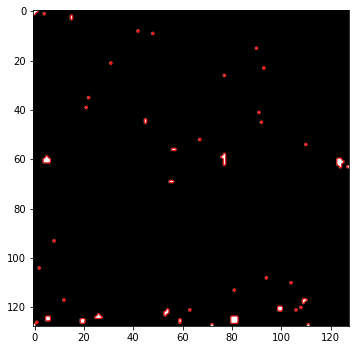

In [62]:
# np.sum(act_pix)
thre = 1
plt.figure(figsize=[5,5])
plt.imshow(act_pix,cmap='gray')
contours = measure.find_contours(act_pix,0.5)
ROI = []
count=0
for contour in contours:
    if contour.shape[0]>thre and contour.shape[0]<50:
        p = Path(contour)
        plt.plot(contour[:,1], contour[:,0], color = 'r',lw=1)
        roi = p.contains_points(coordinates)
        roi = roi.reshape(128,128)
        ROI.append(roi)
        count+=1
#         if count>4:
#             break
plt.tight_layout()

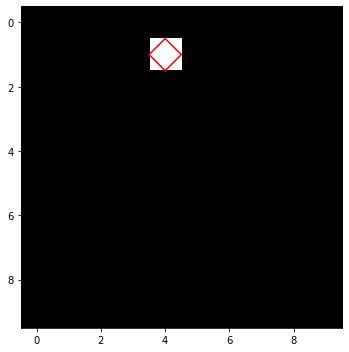

In [55]:
plt.figure(figsize=[5,5])
plt.imshow(np.sum(ROI,axis=0)[:10,:10],cmap='gray')
plt.plot(contour[:,1],contour[:,0],color='r')
plt.tight_layout()

In [63]:
b, a = ss.butter(2, 0.002, btype='high')
dff_hp = ss.filtfilt(b,a,dff,axis=0,padlen=None)
dff_hp.shape

(6000, 128, 128)

/var/folders/87/trl8ql4s7vj6fkdtrrkcwx6s0zb2d2/T/ipykernel_4338/1590852497.py:7: RuntimeWarning: invalid value encountered in true_divide
  dFF = np.sum(dFF,axis=1)/np.sum(ROI[r])
/var/folders/87/trl8ql4s7vj6fkdtrrkcwx6s0zb2d2/T/ipykernel_4338/1590852497.py:7: RuntimeWarning: invalid value encountered in true_divide
  dFF = np.sum(dFF,axis=1)/np.sum(ROI[r])


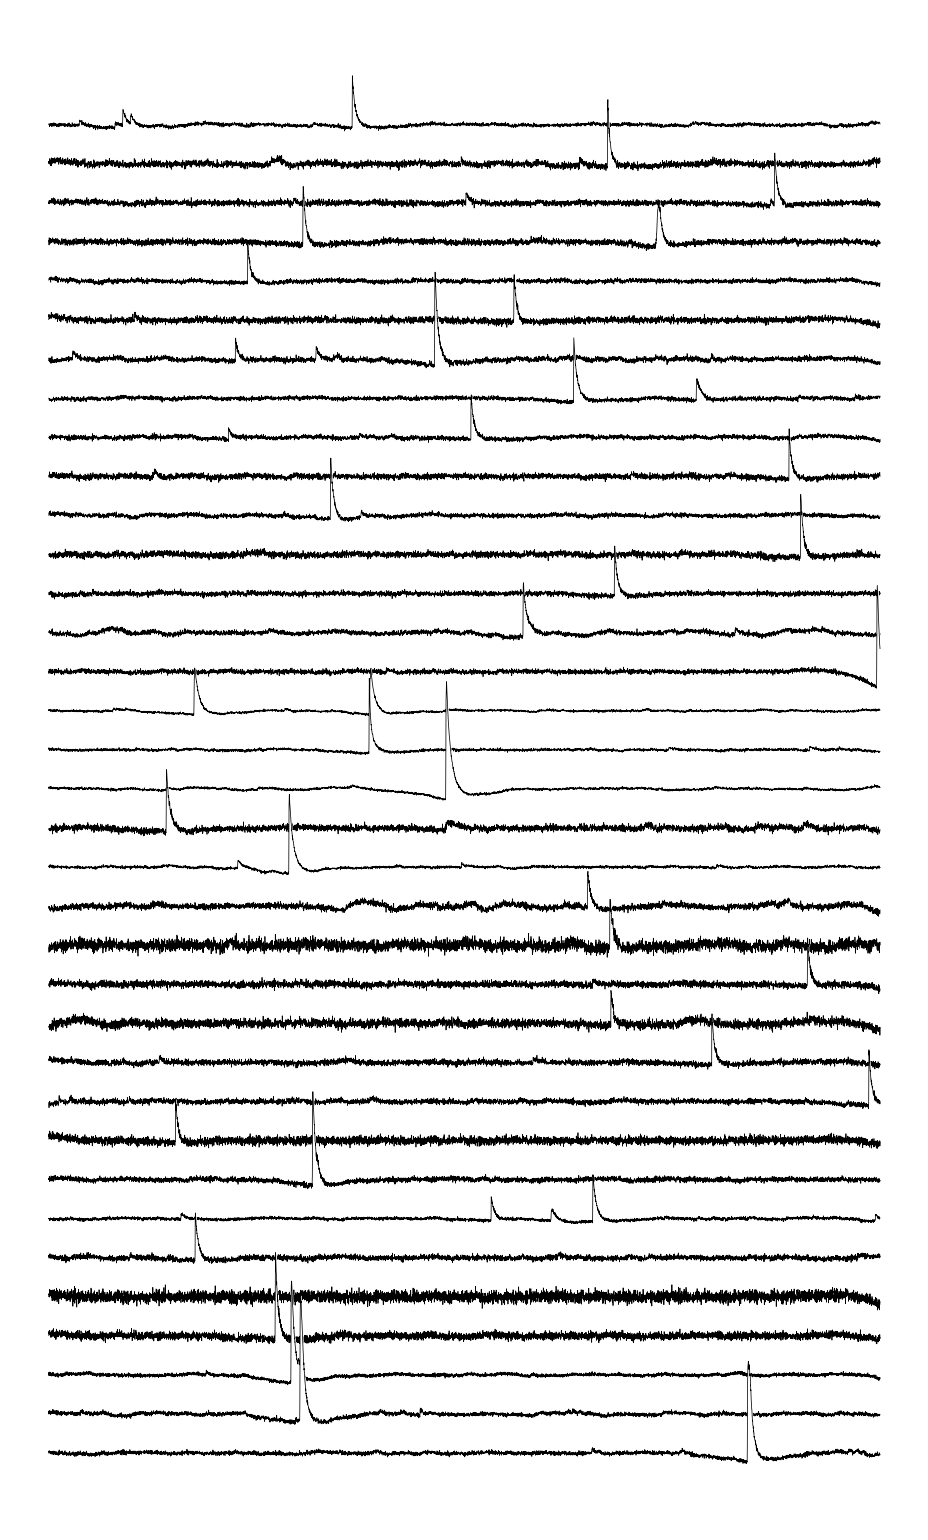

In [127]:
def isNaN(A):
    return A!=A
plt.figure(figsize=[13,len(ROI)/2])
i=1
for r in range(len(ROI)):
    dFF = np.sum(ROI[r]*dff_hp,axis=1)
    dFF = np.sum(dFF,axis=1)/np.sum(ROI[r])
    if isNaN(dFF[0]) or np.std(dFF[:50])>0.04:
        continue
        
    x = np.arange(dFF.shape[0])
    plt.plot(x,dFF-i/2,color='k',zorder=r+1,lw=0.75)
    plt.fill_between(x,dFF-i/2,-i/2,color='w',zorder=r+1)

#     x = np.arange(dFF.shape[0]-1)
#     plt.plot(x,np.diff(dFF)-i/5,color='k',zorder=r+1,lw=0.75)
#     plt.fill_between(x,np.diff(dFF)-i/5,-i/5,color='w',zorder=r+1)
    
    plt.axis('off')
    i+=1
plt.tight_layout()
plt.show()

/var/folders/87/trl8ql4s7vj6fkdtrrkcwx6s0zb2d2/T/ipykernel_4338/979151168.py:5: RuntimeWarning: invalid value encountered in true_divide
  dFF = np.sum(dFF,axis=1)/np.sum(ROI[r])


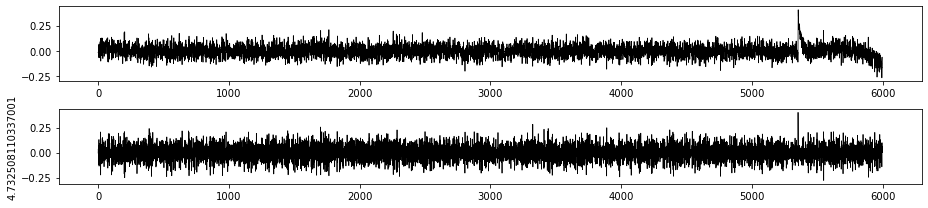

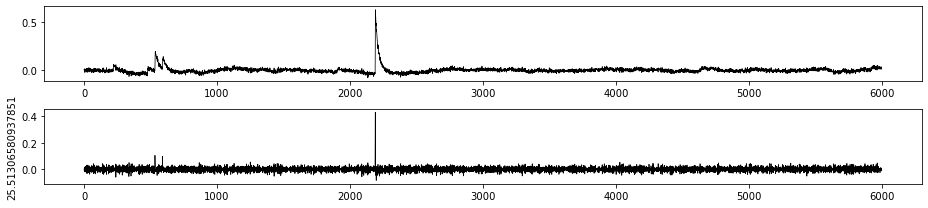

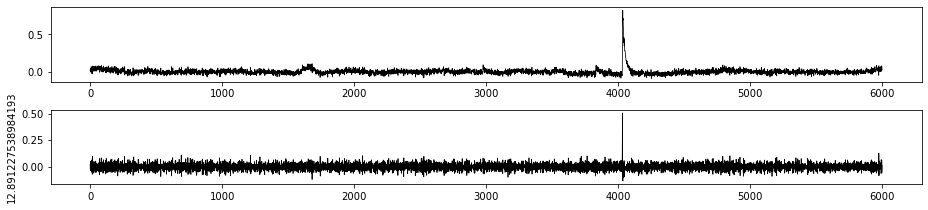

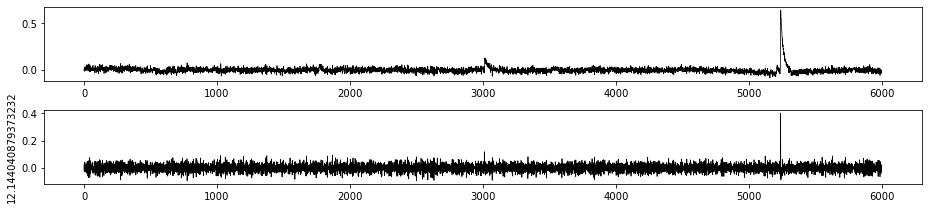

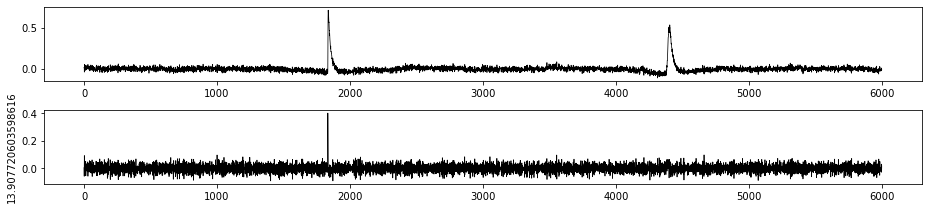

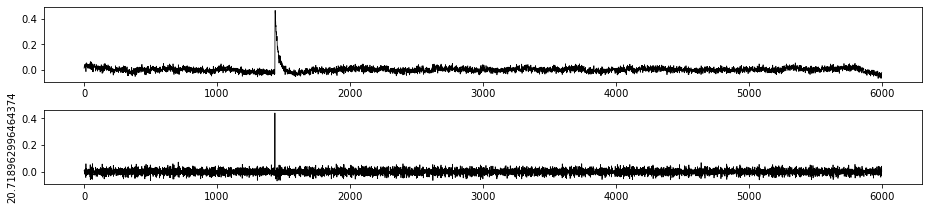

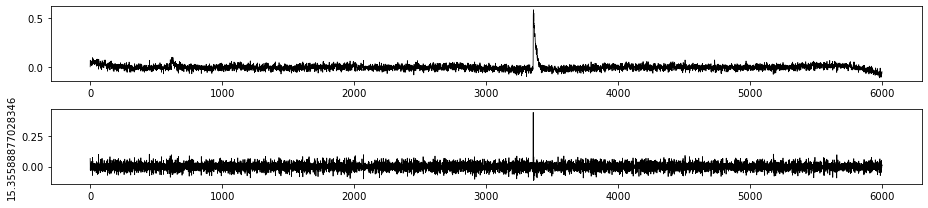

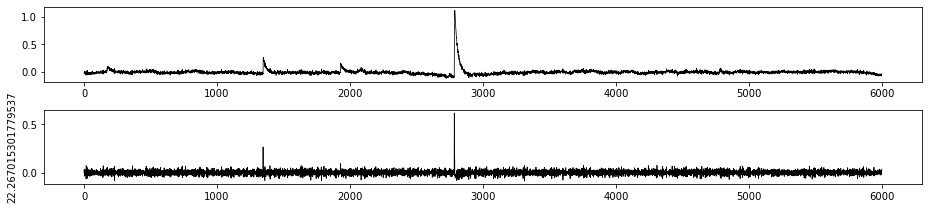

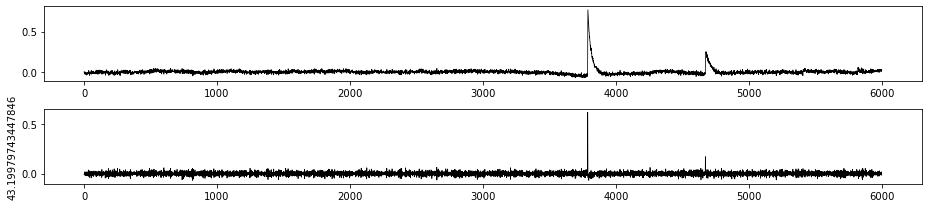

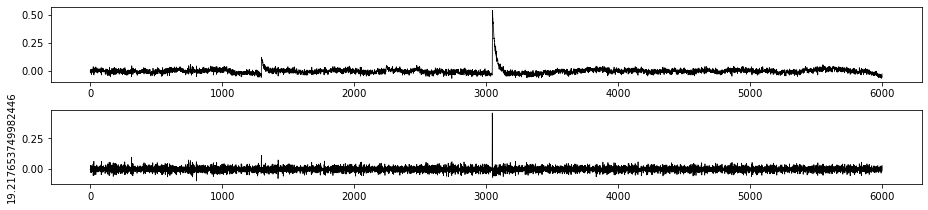

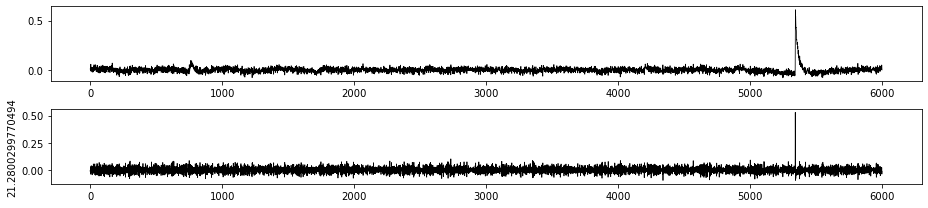

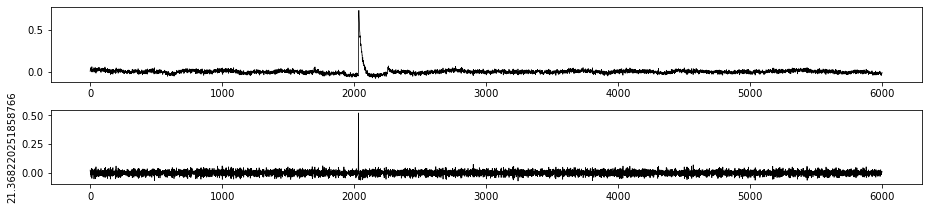

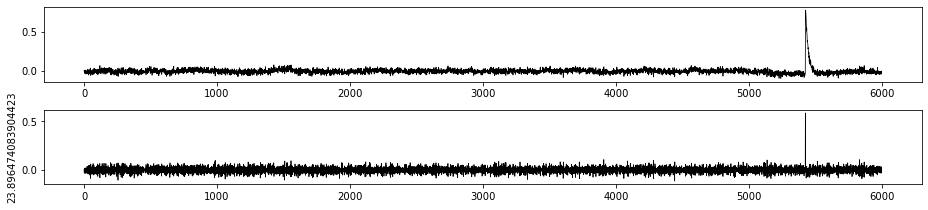

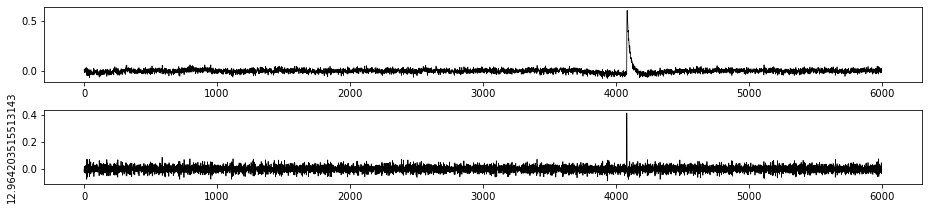

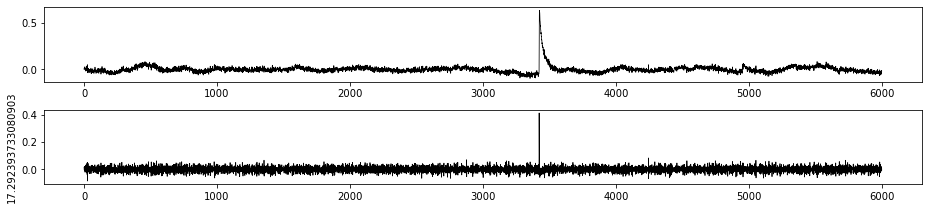

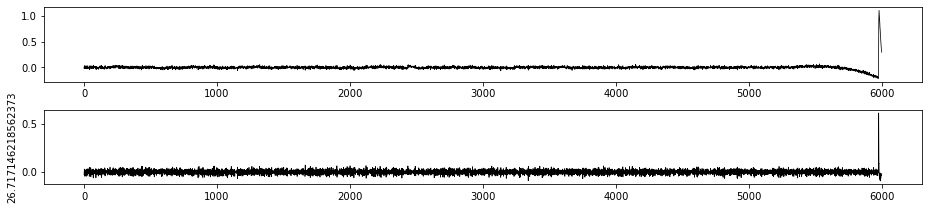

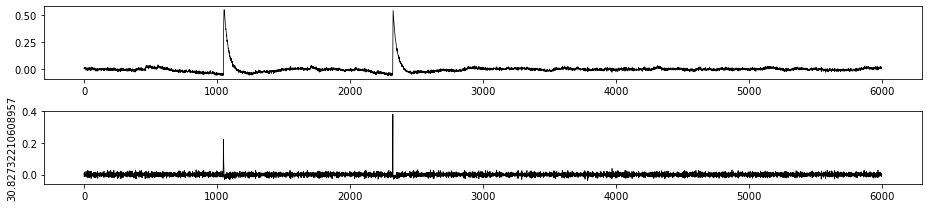

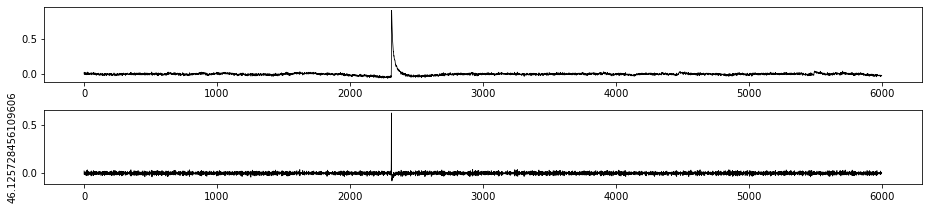

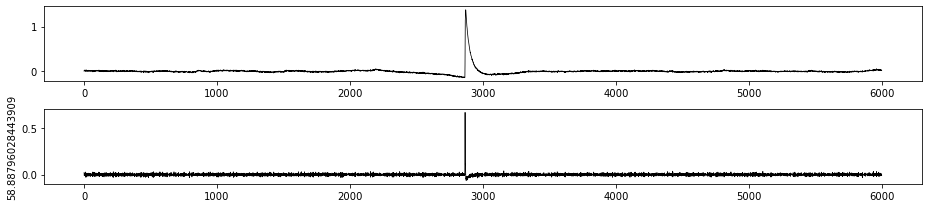

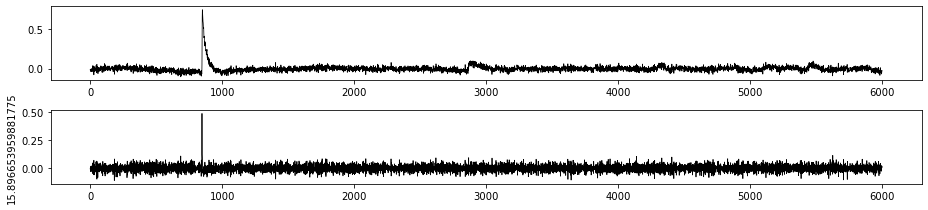

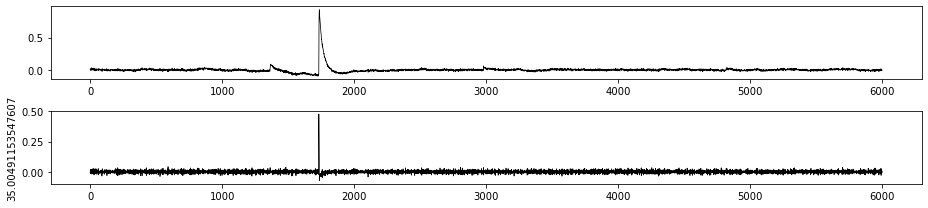

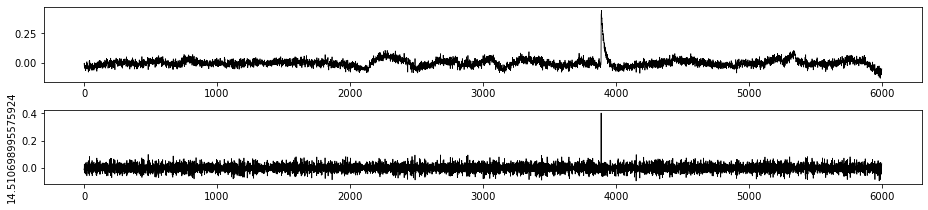

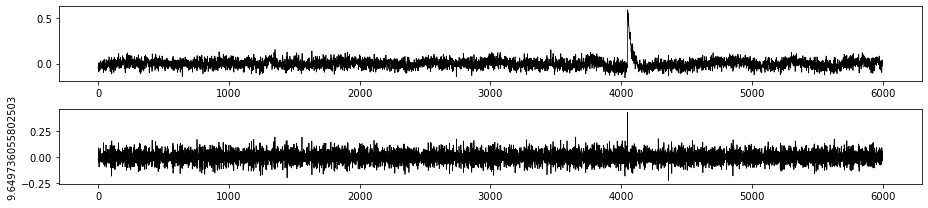

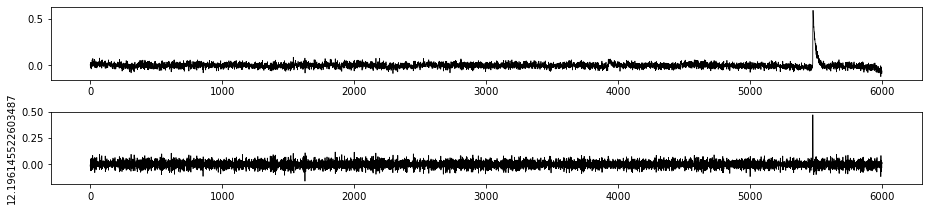

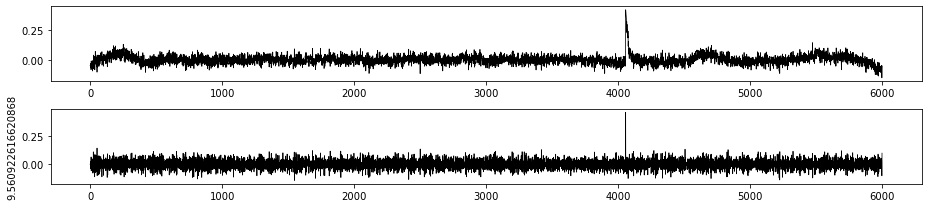

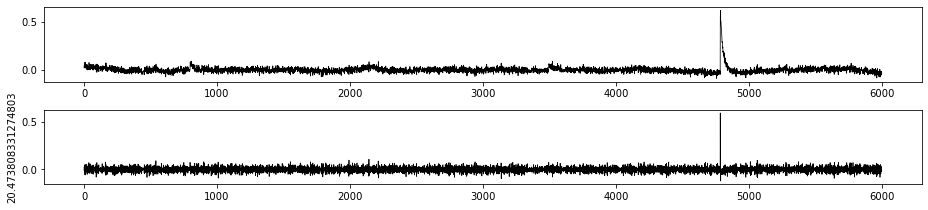

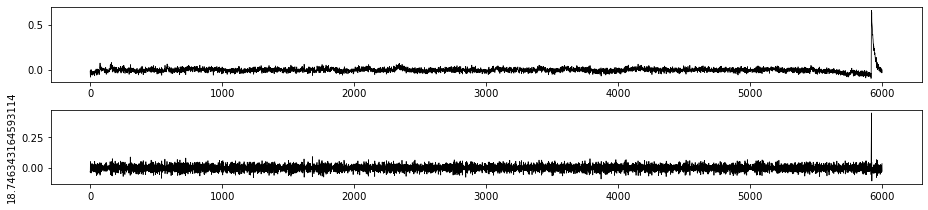

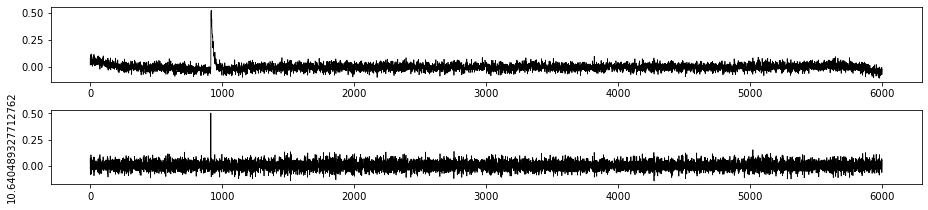

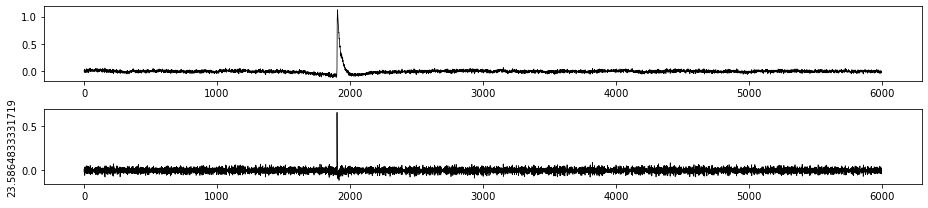

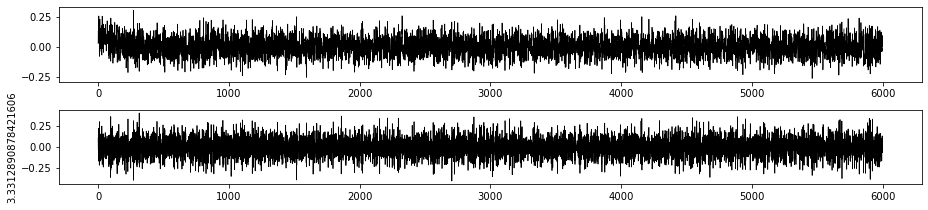

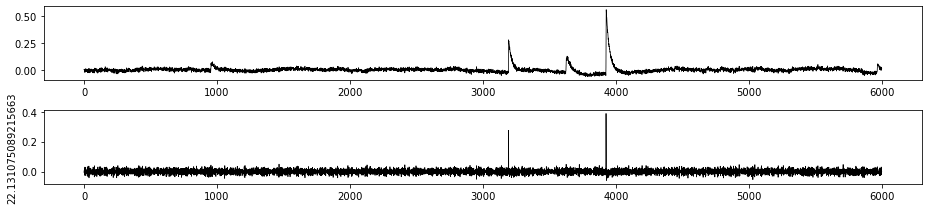

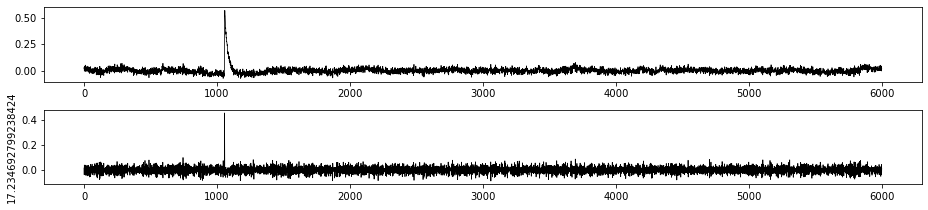

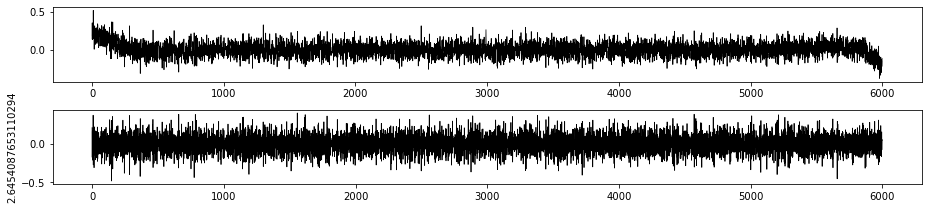

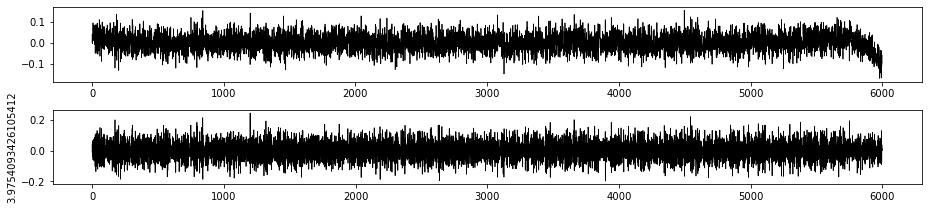

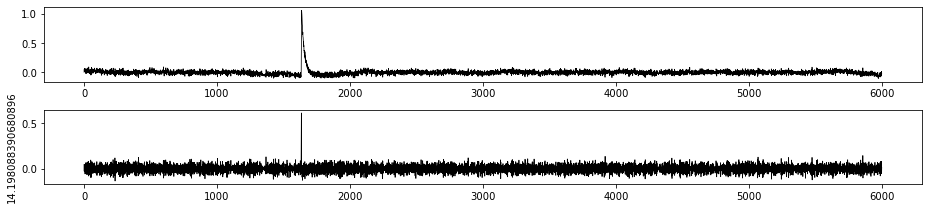

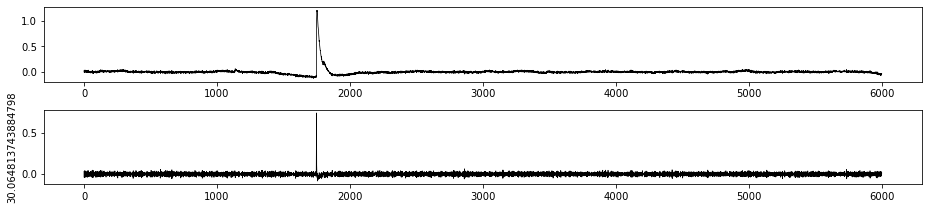

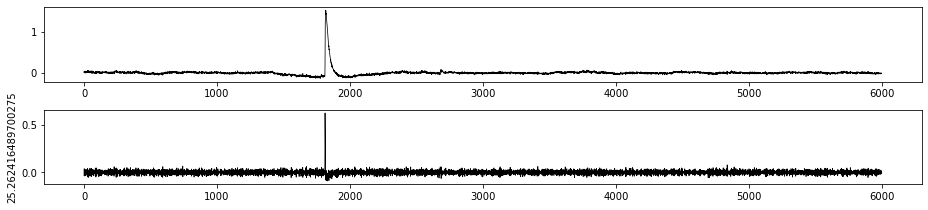

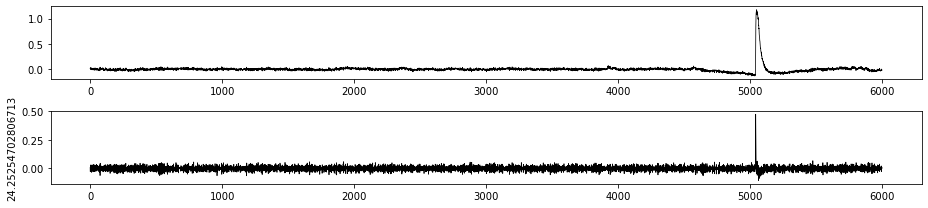

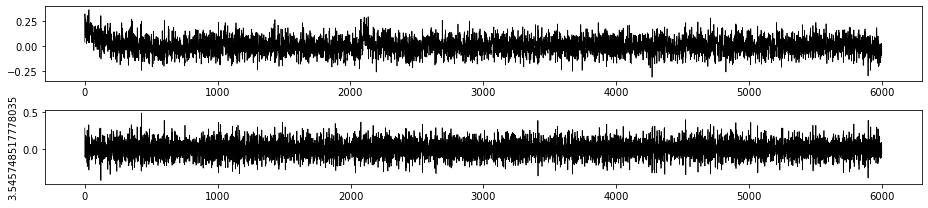

/var/folders/87/trl8ql4s7vj6fkdtrrkcwx6s0zb2d2/T/ipykernel_4338/979151168.py:5: RuntimeWarning: invalid value encountered in true_divide
  dFF = np.sum(dFF,axis=1)/np.sum(ROI[r])


In [191]:
DFF = []
R = []
for r in range(43):
    dFF = np.sum(ROI[r]*dff_hp,axis=1)
    dFF = np.sum(dFF,axis=1)/np.sum(ROI[r])
    if isNaN(dFF[0]):
        continue
#     if np.max(dFF)/np.std(dFF[:50])<7:
#         continue
    plt.figure(figsize=[13,3])
    x = np.arange(dFF.shape[0])
    ax1 = plt.subplot(211)
    ax1.plot(x,dFF,color='k',zorder=r+1,lw=0.75)

    x = np.arange(dFF.shape[0]-1)
    ax2 = plt.subplot(212)
    ax2.plot(x,np.diff(dFF),color='k',zorder=r+1,lw=0.75)

    #     x = np.arange(dFF.shape[0]-1)
    #     plt.plot(x,np.diff(dFF)-i/5,color='k',zorder=r+1,lw=0.75)
    #     plt.fill_between(x,np.diff(dFF)-i/5,-i/5,color='w',zorder=r+1)


    ax2.set_ylabel('%s' %(np.max(np.diff(dFF))/np.std(np.diff(dFF[:50]))))
    plt.tight_layout()
    plt.show()
    plt.close
# print(np.std(dFF[:50]))
# print(np.max(dFF))
# np.max(np.diff(dFF))

In [154]:
# len(ROI)
np.max(np.diff(dFF))
# plt.imshow(act_pix,cmap='gray')

0.470011229181924

In [105]:
# dFF
for r in range(len(ROI)):
    if np.sum(ROI[r])==1:
        print(r)
# np.sum(ROI[37])

1
3
4
5
6
7
8
9
10
11
13
14
15
20
22
23
24
25
26
27
30
32
33
39


In [83]:
len(ROI)

43

In [ ]:
Fb = np.min(img,axis=0)
Fb.shape

In [ ]:
F0 = img[0,:,:]

In [ ]:
img_dff = (img-F0)/(F0-Fb)
img_dff.shape

In [ ]:
b, a = ss.butter(2, 0.002, btype='high')
img_dff = ss.filtfilt(b, a, img_dff,axis=0,padlen=None)
img_dff.shape

In [ ]:
img_dff = np.reshape(img_dff,(6000,128*128))
img_dff.shape

In [ ]:
img_dff = np.transpose(img_dff)
img_dff.shape

In [ ]:
img_dff+=10
model = NMF(n_components=25,init='random',random_state=0,max_iter=200)
W = model.fit_transform(img_dff)
H = model.components_

In [ ]:
plt.figure(figsize=[13,13])
for i in range(25):
    ax = plt.subplot(5,5,i+1)
    ax.imshow(np.reshape(W[:,i],(128,128)))
    ax.axis('off')
plt.tight_layout()
plt.show()
# W_all = []
# for i in range(25):
#     W_all.append(W[:,i].reshape(128,128)>0.8*np.max(W[:,i]))
# np.array(W_all).shape

In [ ]:
NMF?

In [ ]:
W_all = np.sum(W_all,axis=0)
plt.figure(figsize=[7,7])
plt.imshow(W_all)

In [ ]:
np.min(W_all)

In [ ]:
coordinates = []
for r in range(128):
    for c in range(128):
        coordinates.append([r,c])
coordinates = np.array(coordinates)

In [ ]:
def isNaN(A):
    return A!=A

In [ ]:
thre = 1
imgData = img_rs
F0 = imgData[0,:,:].astype('float16')
Fb = np.min(imgData.astype('float16'))
dFF = (imgData.astype('float16')-F0.astype('float16'))/(F0.astype('float16')-Fb)

dFF_diff = np.diff(dFF, axis=0)
plt.figure(figsize=[8,8])
act_pix = np.max(dFF_diff,axis=0)>0.4
# bg = imgData[-1,:,:]>Fb+500
# act_pix = bg*act_pix

plt.figure(figsize=[8,8])
plt.imshow(act_pix,cmap='gray',vmax=0.5)

contours = measure.find_contours(act_pix, 0.5)
for contour in contours:
    if contour.shape[0]>thre:
        plt.plot(contour[:,1], contour[:,0], color = 'r',lw=1)
plt.tight_layout()
# plt.savefig(os.path.join(imgPath,date,'summary')+'\\ROI_%s.svg' %os.path.basename(imgFile)[:-4],format='svg')
plt.show()
plt.close()


Fb = np.min(imgData[-1,:,:]).astype('float16')
F0 = np.mean(imgData[:5,:,:],axis=0).astype('float16')

rois = []
for contour in contours:
    if contour.shape[0]>thre and contour.shape[0]<10*thre:
        p = Path(contour)
        roi = p.contains_points(coordinates)
        roi = roi.reshape(128,128)
        rois.append(roi)

fig = plt.figure(figsize=[12,len(rois)/5])
y_shift = 0
x = np.arange(1,imgData.shape[0]+1)
for roi in range(len(rois)):
    
    offset = y_shift
    
    F = np.sum(rois[roi]*imgData,axis=1)
    F = np.sum(F,axis=1)
    dFF_all = (F - np.sum(rois[roi]*F0)/np.sum(rois[roi]))/(np.sum(rois[roi]*F0)/np.sum(rois[roi])-Fb)
#     print(dFF_all.shape)
    
#     dFF_all = []
#     for frame in range(imgData.shape[0]):

#         F_single = np.sum(rois[roi]*imgData[frame,:,:])/np.sum(rois[roi])
#         dFF = (F_single - np.sum(rois[roi]*F0)/np.sum(rois[roi]))/(np.sum(rois[roi]*F0)/np.sum(rois[roi])-Fb)
#         dFF_all.append(dFF)  
#     dFF_all = np.array(dFF_all)

    b, a = ss.butter(2, 0.002, btype='high')
    dFF_hp_filt = ss.filtfilt(b, a, dFF_all,padlen=None)
    peaks,_ = ss.find_peaks(dFF_hp_filt,height=0.2)

    if isNaN(np.mean(dFF_hp_filt)):
        continue
    plt.fill_between(x,dFF_hp_filt - offset, 0 - offset, zorder=y_shift+1, facecolor='w', edgecolor='w', lw=0, 
                     closed=True)
    plt.plot(x,dFF_hp_filt - offset,zorder=y_shift+1, color='k', lw=1)
    plt.title('%s' %np.std(dFF_hp_filt[:50]))
#         plt.scatter(peaks,dFF_all[peaks] - offset,color='m')
#     plt.axis('off')
    y_shift+=1            
plt.tight_layout()
# sumPath = os.path.join(imgPath,date,'summary')
# if not os.path.exists(sumPath):
#     os.makedirs(sumPath)
# plt.savefig(sumPath+'\\dFF_traces_%s.svg' %os.path.basename(imgFile)[:-4],format='svg')
plt.show()
plt.close()

In [ ]:
imgData_rs = np.reshape(imgData,(6000,128*128))
imgData_rs.shape

In [ ]:
plt.imshow(imgData_rs,vmax=3000)

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
F = []
for f in range(imgData_hp_filt.shape[0]):
    frame = np.ndarray.flatten(imgData_hp_filt[f,:,:])
    F.append(frame)

In [ ]:
imgData_rs = np.transpose(F)
imgData_rs.shape

In [ ]:
plt.figure(figsize=[10,30])
plt.imshow(imgData_rs+400,vmax=750)

In [ ]:
W.shape
# np.max(imgData_rs)

In [ ]:
H.shape

In [ ]:
plt.figure(figsize=[6,6])
plt.imshow(w)

In [ ]:
np.max(w)

In [ ]:
F = []
for i in range(imgData_hp_filt.shape[0]):
    f = np.sum((w>np.max(w)/2)*imgData_hp_filt[i,:,:])
    F.append(f)

In [ ]:
plt.plot(F)

In [ ]:
len(F)

In [ ]:
F
# w.shape
# imgData_hp_filt[i,:,:].shape
# np.sum((w>20)*imgData_hp_filt[i,:,:])

In [ ]:
imgData_hp_filt.shape

In [ ]:
(w*imgData_hp_filt[0,:,:]).shape

In [ ]:
np.sum((w>20)*imgData_hp_filt[0,:,:])

In [ ]:
w_f = np.ndarray.flatten(w)

In [ ]:
w_f.shape

In [ ]:
plt.hist(w_f,bins=10000)

In [ ]:
np.max(w)

In [ ]:
plt.hist?

In [ ]:
A = np.random.randint(0,5,size=[3,1])

In [ ]:
B = np.random.randint(0,5,size=[1,3])

In [ ]:
B

In [ ]:
np.dot(A,B)

In [ ]:
A

In [ ]:
A = np.arange(10)
B = np.arange(10)
np.dot(A,B)

In [ ]:
A